## Exercise 08 — Seaborn

Commit activity for `project1` ready submissions visualized with Seaborn.

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')
PALETTE = 'magma'
DB_PATH = '../data/checking-logs.sqlite'
FIG_HEIGHT = 10
FIG_WIDTH = FIG_HEIGHT * 1.5
BACKGROUND_COLOR = '#d9d9d9'

In [2]:
with sqlite3.connect(DB_PATH) as connection:
    checker_info = pd.read_sql_query("PRAGMA table_info('checker');", connection)
checker_info

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,status,TEXT,0,None,0
2,2,success,INTEGER,0,None,0
3,3,timestamp,TIMESTAMP,0,None,0
4,4,numTrials,INTEGER,0,None,0
5,5,labname,TEXT,0,None,0
6,6,uid,TEXT,0,None,0


In [3]:
with sqlite3.connect(DB_PATH) as connection:
    project_commits = pd.read_sql_query(
        """
        SELECT uid, timestamp
        FROM checker
        WHERE uid LIKE 'user_%'
          AND labname = 'project1'
          AND status = 'ready'
        ORDER BY timestamp
        """,
        connection,
        parse_dates=['timestamp']
    )
project_commits.head()

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:45.549397
2,user_4,2020-04-17 05:34:24.422370
3,user_4,2020-04-17 05:43:27.773992
4,user_4,2020-04-17 05:46:32.275104


In [4]:
project_commits['timestamp'] = pd.to_datetime(project_commits['timestamp'])
project_commits = project_commits.sort_values('timestamp').reset_index(drop=True)
project_commits['num_trials'] = project_commits.groupby('uid').cumcount() + 1
project_commits.head()

,uid,timestamp,num_trials
0,user_4,2020-04-17 05:19:02.744528,1
1,user_4,2020-04-17 05:22:45.549397,2
2,user_4,2020-04-17 05:34:24.422370,3
3,user_4,2020-04-17 05:43:27.773992,4
4,user_4,2020-04-17 05:46:32.275104,5


In [5]:
user_totals = project_commits.groupby('uid')['num_trials'].max().sort_values(ascending=False)
user_totals.head()

uid
user_4     164
user_14     99
user_2      95
user_25     77
user_26     69
Name: num_trials, dtype: int64

In [6]:
leader_over_time = []
running_totals = {}
for row in project_commits.itertuples():
    running_totals[row.uid] = row.num_trials
    leader = max(running_totals.items(), key=lambda item: (item[1], item[0]))[0]
    leader_over_time.append(leader)
leader_counts = pd.Series(leader_over_time).value_counts()
primary_leader = leader_counts.idxmax()
short_lived_leader = leader_counts.idxmin()
leader_counts

user_4    933
user_2     18
Name: count, dtype: int64

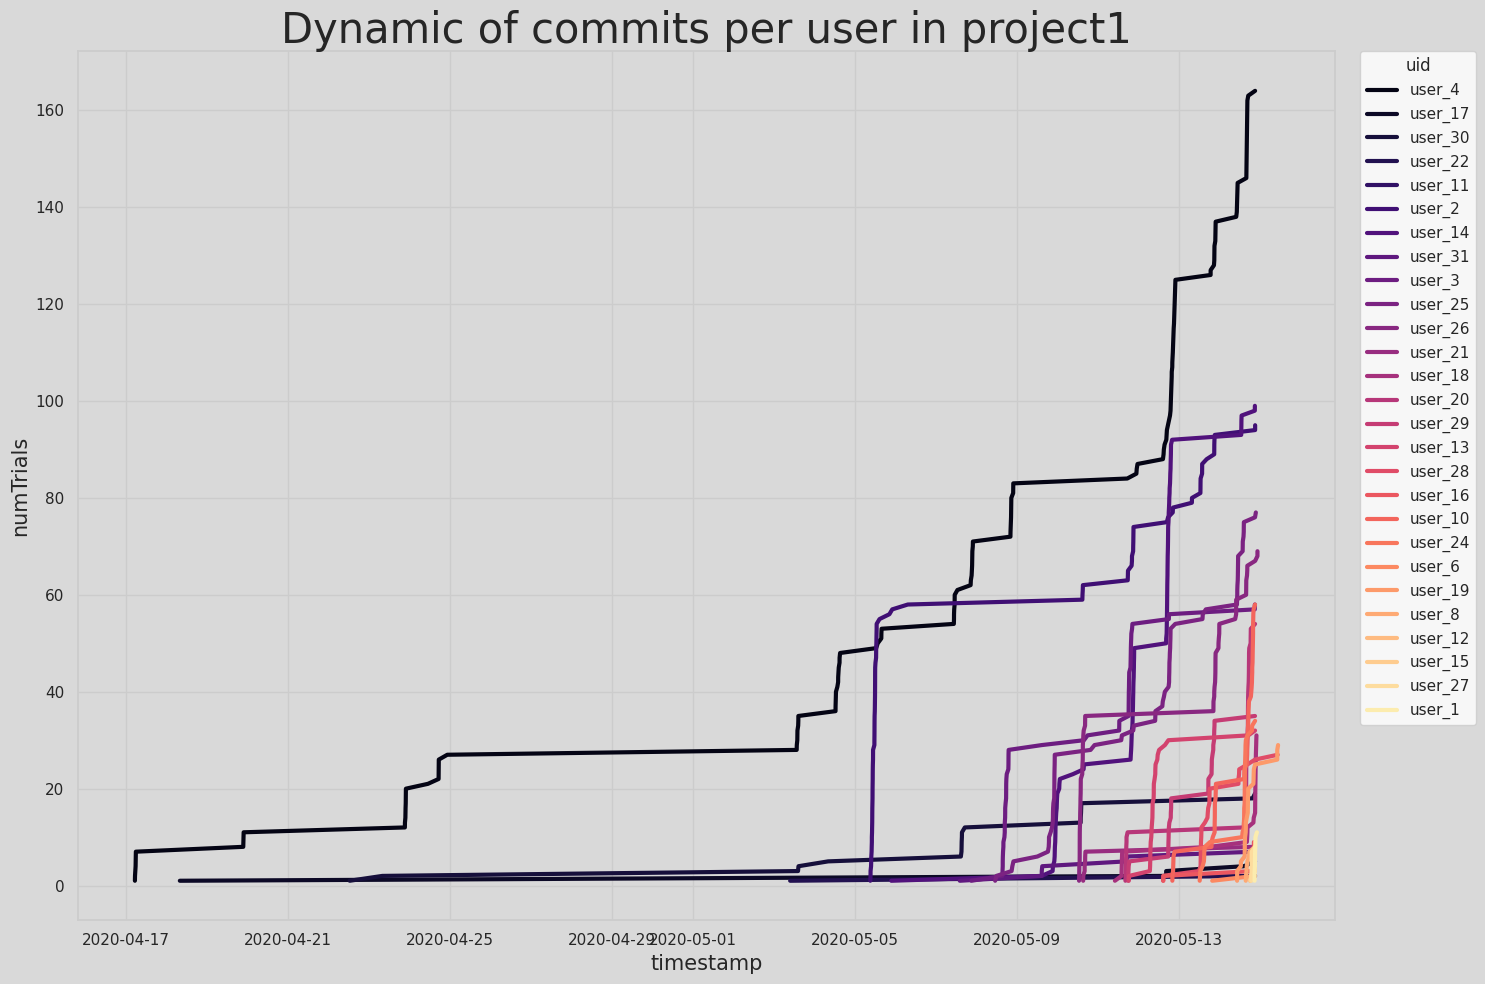

In [7]:
fig, ax = plt.subplots(figsize=(FIG_WIDTH, FIG_HEIGHT))
sns.lineplot(
    data=project_commits,
    x='timestamp',
    y='num_trials',
    hue='uid',
    linewidth=3,
    palette=PALETTE
)
ax.set_title('Dynamic of commits per user in project1', fontsize=30)
ax.set_xlabel('timestamp', fontsize=15)
ax.set_ylabel('numTrials', fontsize=15)
ax.set_facecolor(BACKGROUND_COLOR)
fig.patch.set_facecolor(BACKGROUND_COLOR)
ax.legend(title='uid', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

1. **Which user was the leader in the number of commits almost all of the time?** Answer: _user_4_.
2. **Which user was the leader for only a short period of time?** Answer: _user_2_.